In [1]:
import zipfile
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
zip_file_path = '/content/gdrive/MyDrive/ML/projects/object-detection/wildfire-smoke/Wildfire Smoke.v1-raw.yolov8.zip'
extract_dir = 'Wildfire Smoke.v1-raw.yolov8'
os.makedirs(extract_dir, exist_ok = True)

In [4]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete.")

Extraction complete.


In [5]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 885.4 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none

In [6]:
from ultralytics import YOLO
import yaml

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [7]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 220MB/s]


In [8]:
with open('/content/Wildfire Smoke.v1-raw.yolov8/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

In [9]:
for idx, class_name in enumerate(data['names']):
    print(f'Class ID: {idx}, Class Name: {class_name}')

Class ID: 0, Class Name: smoke


In [10]:
print(model.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
   

In [ ]:
# model_training = model.train(
#     data = '/content/Wildfire Smoke.v1-raw.yolov8/data.yaml',
#     epochs = 60,
#     batch = -1,
#     freeze = 10,
#     patience = 5,
#     dropout = 0.2,
#     augment = True,
#     seed = 77
# )

In [11]:
model_training = model.train(
    data = '/content/Wildfire Smoke.v1-raw.yolov8/data.yaml',
    epochs = 60,
    batch = 32,
    freeze = 10,
    patience = 5,
    cos_lr = True,
    lr0 = 1e-3,
    lrf = 1e-2,
    weight_decay = 1e-4,
    dropout = 0.3,
    augment = True,
    optimizer = 'AdamW',
    momentum = 0.9,
    val = True,
    seed = 77
)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Wildfire Smoke.v1-raw.yolov8/data.yaml, epochs=60, time=None, patience=5, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=77, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 15.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 75.7MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/Wildfire Smoke.v1-raw.yolov8/train/labels... 516 images, 0 backgrounds, 0 corrupt: 100%|██████████| 516/516 [00:00<00:00, 711.80it/s]

train: New cache created: /content/Wildfire Smoke.v1-raw.yolov8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Wildfire Smoke.v1-raw.yolov8/valid/labels... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<00:00, 526.98it/s]

val: New cache created: /content/Wildfire Smoke.v1-raw.yolov8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0001), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      5.09G      2.194      3.777      1.921          7        640: 100%|██████████| 17/17 [00:18<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all        147        147      0.203      0.197      0.094     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      5.15G      1.769      1.676      1.524          7        640: 100%|██████████| 17/17 [00:12<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all        147        147      0.487      0.463      0.437      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      5.28G      1.787      1.522      1.635          8        640: 100%|██████████| 17/17 [00:10<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all        147        147      0.223       0.49      0.338      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      5.18G      1.625       1.37      1.464          6        640: 100%|██████████| 17/17 [00:10<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all        147        147       0.51      0.701      0.577      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      5.62G      1.699      1.329      1.523          6        640: 100%|██████████| 17/17 [00:12<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all        147        147      0.484      0.524      0.478      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      5.18G      1.606      1.298      1.495          9        640: 100%|██████████| 17/17 [00:15<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        147        147      0.558      0.551      0.543      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      5.62G      1.659      1.244      1.515          9        640: 100%|██████████| 17/17 [00:12<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]

                   all        147        147      0.475      0.619      0.532      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60       5.2G       1.64      1.167      1.492          8        640: 100%|██████████| 17/17 [00:11<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all        147        147      0.634      0.637      0.632      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      5.59G      1.613      1.147      1.445         10        640: 100%|██████████| 17/17 [00:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]

                   all        147        147      0.604      0.694      0.664      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      5.21G      1.611      1.127       1.47          5        640: 100%|██████████| 17/17 [00:13<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all        147        147      0.565      0.497      0.551      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      5.59G      1.553      1.076      1.406          8        640: 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all        147        147      0.748      0.706      0.775      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      5.19G      1.561      1.055      1.414          7        640: 100%|██████████| 17/17 [00:12<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]

                   all        147        147      0.702      0.701      0.726      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      5.62G      1.532      1.046      1.404          9        640: 100%|██████████| 17/17 [00:10<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all        147        147      0.741      0.782      0.789      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      5.19G      1.504     0.9992      1.376          6        640: 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all        147        147      0.673        0.7      0.699      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      5.62G      1.485      1.028      1.348          4        640: 100%|██████████| 17/17 [00:14<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]

                   all        147        147      0.776      0.752      0.806      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      5.19G      1.433     0.9655      1.344          7        640: 100%|██████████| 17/17 [00:13<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all        147        147      0.709       0.81      0.791       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      5.59G      1.476     0.9806      1.353          8        640: 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all        147        147      0.702      0.776      0.779      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      4.94G      1.442     0.9615      1.327          5        640: 100%|██████████| 17/17 [00:10<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all        147        147      0.719      0.818      0.796      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      5.59G       1.43      0.927       1.35          6        640: 100%|██████████| 17/17 [00:11<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all        147        147      0.798       0.83      0.824      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      5.18G      1.369     0.8987      1.299          8        640: 100%|██████████| 17/17 [00:14<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all        147        147      0.797      0.789      0.844      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      5.62G      1.386     0.9178      1.319          7        640: 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

                   all        147        147      0.761      0.796      0.813      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      5.19G      1.352      0.828      1.288          5        640: 100%|██████████| 17/17 [00:10<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all        147        147      0.834      0.782      0.873      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      5.62G      1.365     0.8615      1.278          4        640: 100%|██████████| 17/17 [00:10<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all        147        147      0.835      0.755      0.848      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      5.19G      1.362     0.8307      1.274          9        640: 100%|██████████| 17/17 [00:12<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all        147        147      0.797        0.8      0.807      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      5.59G      1.327     0.8282       1.27         10        640: 100%|██████████| 17/17 [00:13<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all        147        147      0.856      0.837      0.884      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      5.22G      1.323     0.7768      1.271         10        640: 100%|██████████| 17/17 [00:13<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]

                   all        147        147      0.845      0.776      0.855       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      5.62G      1.296     0.7782      1.249          5        640: 100%|██████████| 17/17 [00:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

                   all        147        147      0.821      0.812      0.876      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      5.18G       1.26     0.7653      1.246          7        640: 100%|██████████| 17/17 [00:10<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all        147        147      0.868      0.853      0.891      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      5.75G      1.285     0.7975      1.264         10        640: 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all        147        147      0.805       0.83       0.89      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      5.22G      1.309      0.761      1.272          6        640: 100%|██████████| 17/17 [00:14<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all        147        147      0.834      0.864      0.893      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      5.75G      1.301      0.769      1.237         10        640: 100%|██████████| 17/17 [00:12<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]

                   all        147        147      0.791      0.844      0.865       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      5.22G      1.202     0.7357      1.239          8        640: 100%|██████████| 17/17 [00:11<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all        147        147      0.716      0.864      0.842      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      5.62G      1.264     0.7388      1.236          9        640: 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all        147        147       0.82      0.866      0.904      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      5.17G      1.171     0.6898       1.19          7        640: 100%|██████████| 17/17 [00:13<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]

                   all        147        147      0.877      0.778      0.891      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      5.62G      1.145     0.6726       1.19          8        640: 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]

                   all        147        147       0.81      0.864      0.901      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      5.18G      1.188     0.6939       1.19          6        640: 100%|██████████| 17/17 [00:11<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all        147        147      0.855      0.857       0.91      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      5.62G      1.149     0.6665       1.19          5        640: 100%|██████████| 17/17 [00:10<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all        147        147       0.84      0.859        0.9      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      5.17G      1.183     0.6933      1.196          5        640: 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all        147        147      0.774      0.888      0.897      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      5.62G      1.142     0.6549       1.16          6        640: 100%|██████████| 17/17 [00:13<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all        147        147      0.818      0.886      0.914      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      5.22G      1.126     0.6408      1.146          8        640: 100%|██████████| 17/17 [00:13<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all        147        147      0.809      0.837      0.904      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      6.06G       1.13     0.6796      1.164          6        640: 100%|██████████| 17/17 [00:10<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all        147        147      0.884       0.78      0.909      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      4.94G      1.114     0.6485      1.141          9        640: 100%|██████████| 17/17 [00:11<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all        147        147      0.893      0.803      0.904      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60       5.6G      1.078     0.6344      1.133         11        640: 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all        147        147      0.845      0.817      0.903      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      4.98G      1.083     0.6285      1.156          5        640: 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        147        147      0.848      0.844      0.914      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      5.62G      1.107     0.6363       1.15          8        640: 100%|██████████| 17/17 [00:11<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all        147        147      0.894      0.844      0.927      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      5.18G      1.094     0.6166      1.139          7        640: 100%|██████████| 17/17 [00:11<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all        147        147      0.875      0.891      0.926      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      5.61G      1.075     0.5932      1.123         10        640: 100%|██████████| 17/17 [00:11<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all        147        147      0.853       0.91      0.928      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      5.18G      1.077     0.6137      1.149          7        640: 100%|██████████| 17/17 [00:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all        147        147      0.831      0.905      0.916      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      5.59G      1.025     0.5761      1.098          8        640: 100%|██████████| 17/17 [00:13<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all        147        147      0.861      0.891       0.92      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      5.22G     0.9987     0.5701        1.1          6        640: 100%|██████████| 17/17 [00:11<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]

                   all        147        147      0.875      0.878      0.925      0.529


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      5.62G      1.104     0.6087      1.187          4        640: 100%|██████████| 17/17 [00:14<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all        147        147      0.886      0.884      0.927      0.525
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 46, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



51 epochs completed in 0.245 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.94s/it]


                   all        147        147      0.846      0.898      0.923      0.533
Speed: 0.2ms preprocess, 29.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


In [13]:
#best_model = YOLO('/content/runs/detect/train/weights/best.pt')
best_model = YOLO('/content/gdrive/MyDrive/ML/projects/object-detection/wildfire-smoke/best.pt')

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir /content/runs/detect --bind_all

In [15]:
#results_path = '/content/runs/detect/train/results.csv'
results_path = '/content/gdrive/MyDrive/ML/projects/object-detection/wildfire-smoke/results.csv'
results_df = pd.read_csv(results_path)

In [16]:
cols = {}

for col in results_df.columns:
  cols[col] = col.strip()

In [17]:
results_df.rename(columns = cols, inplace = True)

In [18]:
results_df.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

In [22]:
def plot_metrics(results_df, save_im = False):

    fig, axes = plt.subplots(4, 3, figsize = (18, 18))
    axes = axes.flatten()

    # Train Losses
    axes[0].plot(results_df['epoch'], results_df['train/box_loss'], label = 'Train Box Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Train Box Loss')
    axes[0].legend()

    axes[1].plot(results_df['epoch'], results_df['train/cls_loss'], label = 'Train Class Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].set_title('Train Class Loss')
    axes[1].legend()

    axes[2].plot(results_df['epoch'], results_df['train/dfl_loss'], label = 'Train DFL Loss')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Loss')
    axes[2].set_title('Train DFL Loss')
    axes[2].legend()

    # Val Losses
    axes[3].plot(results_df['epoch'], results_df['val/box_loss'], label = 'Val Box Loss')
    axes[3].set_xlabel('Epoch')
    axes[3].set_ylabel('Loss')
    axes[3].set_title('Val Box Loss')
    axes[3].legend()

    axes[4].plot(results_df['epoch'], results_df['val/cls_loss'], label = 'Val Class Loss')
    axes[4].set_xlabel('Epoch')
    axes[4].set_ylabel('Loss')
    axes[4].set_title('Val Class Loss')
    axes[4].legend()

    axes[5].plot(results_df['epoch'], results_df['val/dfl_loss'], label = 'Val DFL Loss')
    axes[5].set_xlabel('Epoch')
    axes[5].set_ylabel('Loss')
    axes[5].set_title('Val DFL Loss')
    axes[5].legend()

    # Metrics
    axes[6].plot(results_df['epoch'], results_df['metrics/precision(B)'], label = 'Precision (Best)')
    axes[6].set_xlabel('Epoch')
    axes[6].set_ylabel('Precision')
    axes[6].set_title('Precision (Best)')
    axes[6].legend()

    axes[7].plot(results_df['epoch'], results_df['metrics/recall(B)'], label = 'Recall (Best)')
    axes[7].set_xlabel('Epoch')
    axes[7].set_ylabel('Recall')
    axes[7].set_title('Recall (Best)')
    axes[7].legend()

    axes[8].plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label = 'mAP@0.5 (Best)')
    axes[8].set_xlabel('Epoch')
    axes[8].set_ylabel('mAP@0.5')
    axes[8].set_title('mAP@0.5 (Best)')
    axes[8].legend()

    axes[9].plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label = 'mAP@0.5:0.95 (Best)')
    axes[9].set_xlabel('Epoch')
    axes[9].set_ylabel('mAP@0.5:0.95')
    axes[9].set_title('mAP@0.5:0.95 (Best)')
    axes[9].legend()

    # Learning Rates
    axes[10].plot(results_df['epoch'], results_df['lr/pg0'], label = 'Learning Rate (pg0)')
    axes[10].set_xlabel('Epoch')
    axes[10].set_ylabel('Learning Rate')
    axes[10].set_title('Learning Rate (pg0)')
    axes[10].legend()

    axes[11].plot(results_df['epoch'], results_df['lr/pg1'], label = 'Learning Rate (pg1)')
    axes[11].set_xlabel('Epoch')
    axes[11].set_ylabel('Learning Rate')
    axes[11].set_title('Learning Rate (pg1)')
    axes[11].legend()

    plt.tight_layout()
    if save_im:
      plt.savefig('YOLO_train_val.png', dpi = 600)
    plt.show()

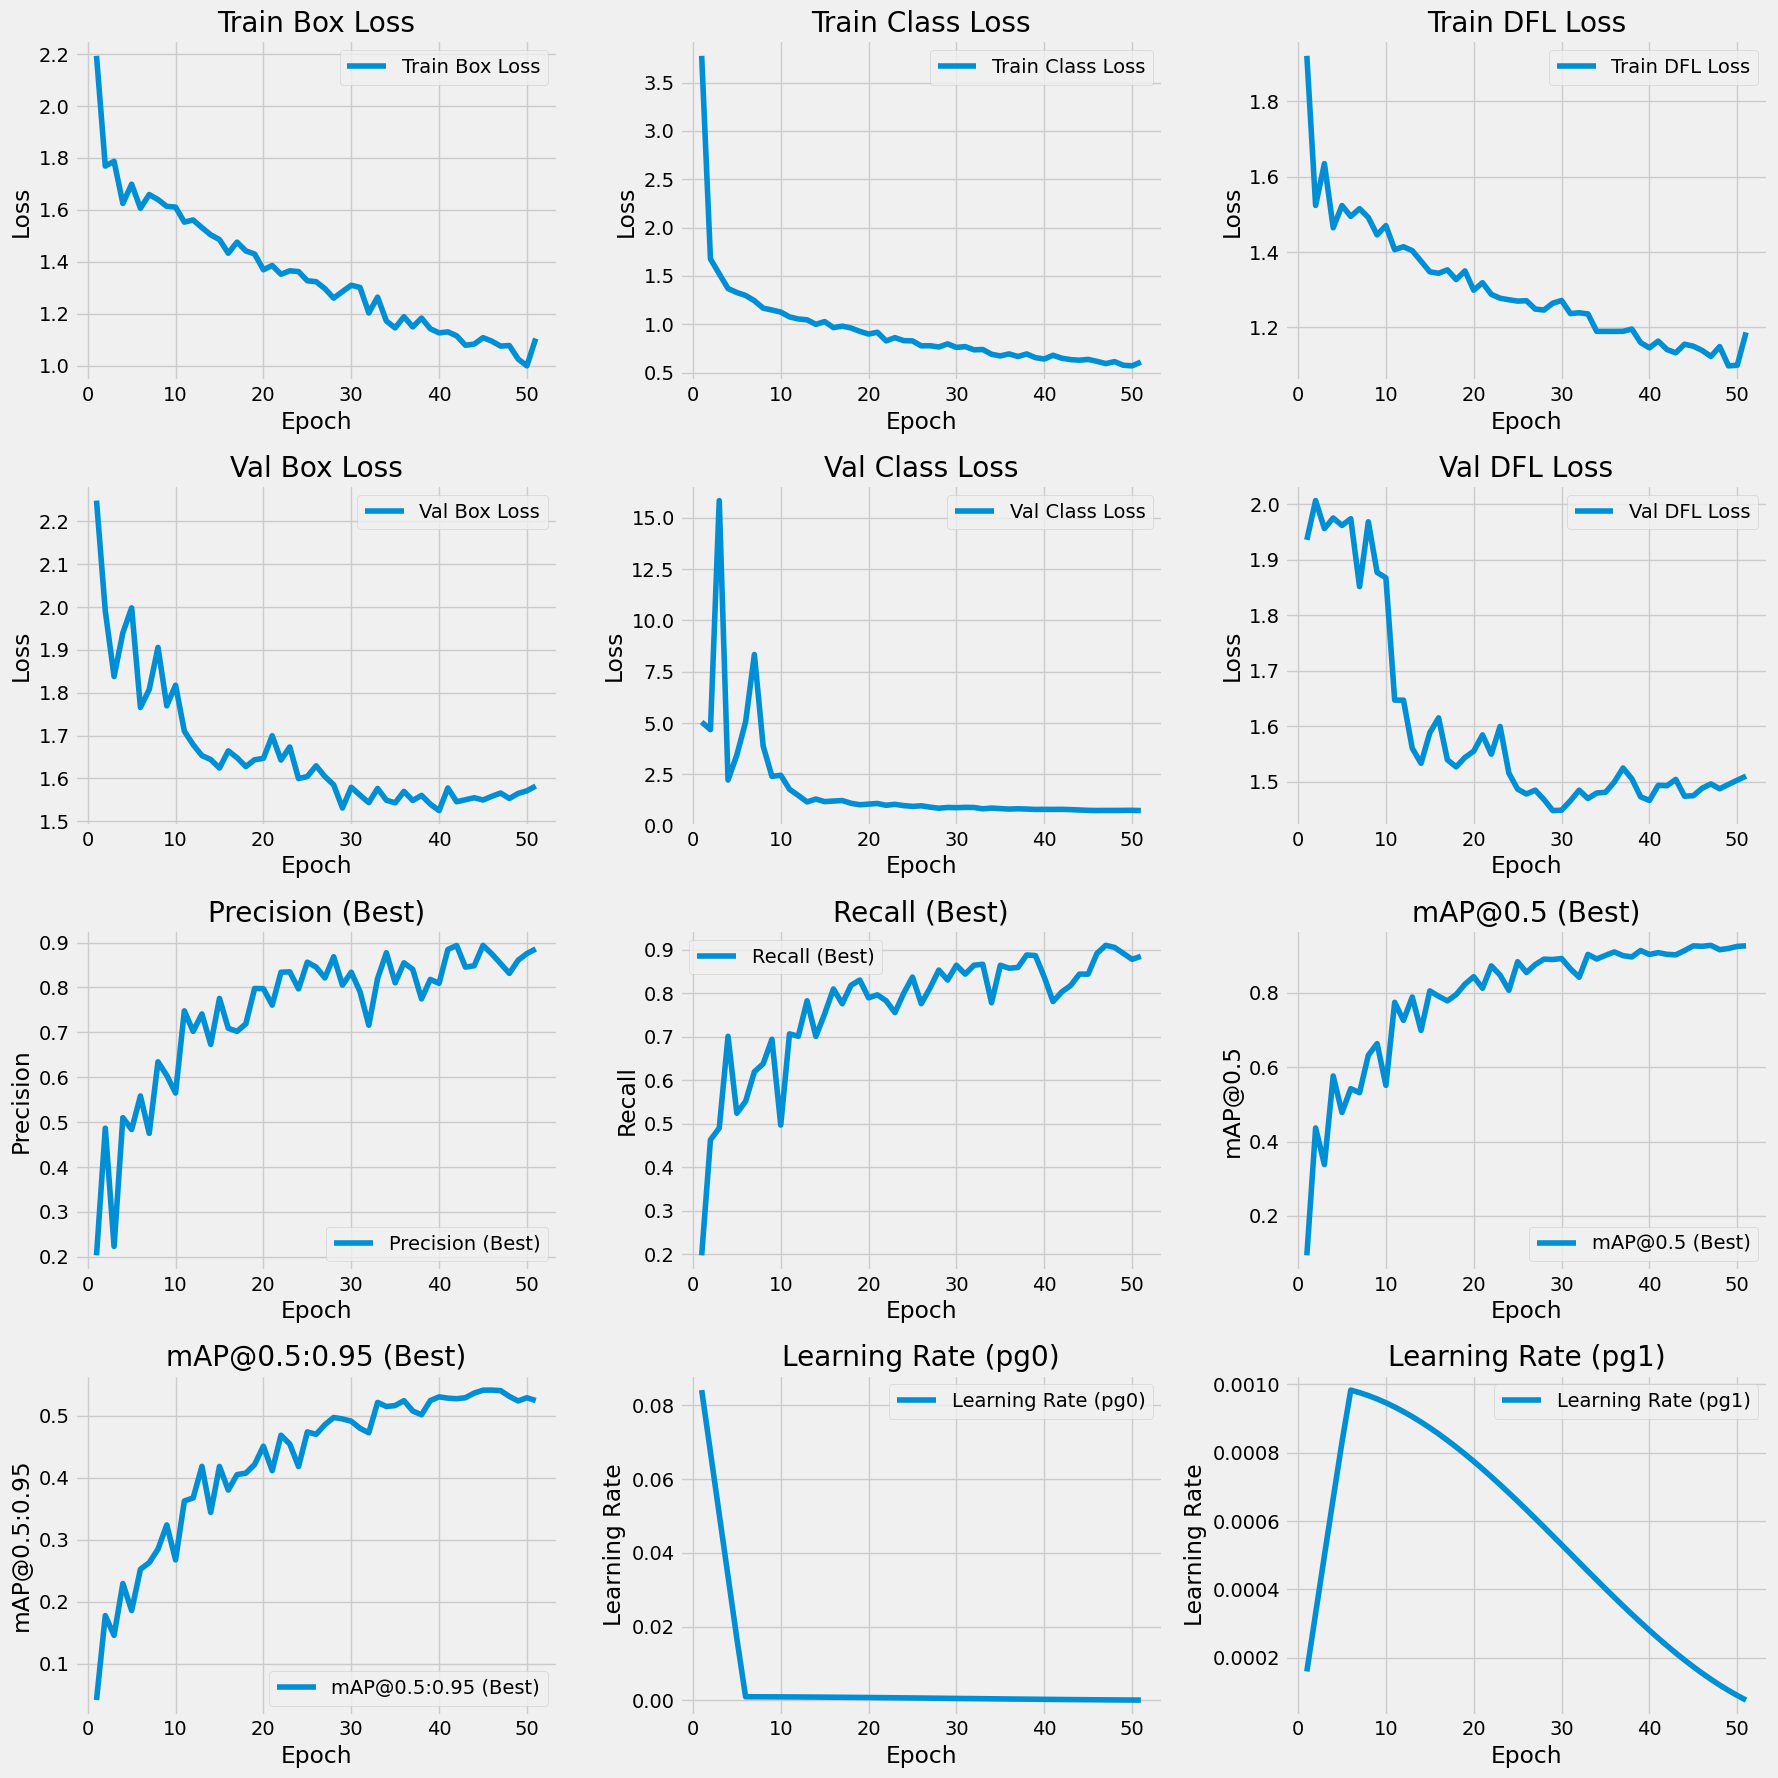

In [23]:
plt.style.use('fivethirtyeight')
plot_metrics(results_df, True)

In [24]:
test_results = best_model.val(split = 'test')

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Wildfire Smoke.v1-raw.yolov8/test/labels... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [00:00<00:00, 589.87it/s]

val: New cache created: /content/Wildfire Smoke.v1-raw.yolov8/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


                   all         74         74       0.89      0.878      0.915      0.554
Speed: 0.7ms preprocess, 30.7ms inference, 0.0ms loss, 11.0ms postprocess per image
Results saved to runs/detect/val


In [25]:
class_names = data['names']
class_results = [test_results.class_result(idx) for idx in range(len(class_names))]
all_results = ['all'] + test_results.mean_results()

test_df = pd.DataFrame({
    'Class': class_names,
    'Box (P)': [result[0] for result in class_results],
    'Box (R)': [result[1] for result in class_results],
    'Box (mAP50)': [result[2] for result in class_results],
    'Box (mAP50-95)': [result[3] for result in class_results]
})

all_df = pd.DataFrame([all_results], columns = test_df.columns)
test_df = pd.concat([test_df, all_df], ignore_index = True)

In [26]:
test_df

,Class,Box (P),Box (R),Box (mAP50),Box (mAP50-95)
0,smoke,0.890156,0.878378,0.914521,0.554267
1,all,0.890156,0.878378,0.914521,0.554267


In [27]:
#test plots

plt.style.use('default')
conf_matrix = Image.open(r"/content/runs/detect/val/confusion_matrix.png")
f1_curve = Image.open(r"/content/runs/detect/val/F1_curve.png")
pr_curve = Image.open(r"/content/runs/detect/val/PR_curve.png")
p_curve = Image.open(r"/content/runs/detect/val/P_curve.png")
r_curve = Image.open(r"/content/runs/detect/val/R_curve.png")
test_batch_targets = Image.open(r"/content/runs/detect/val/val_batch0_labels.jpg")
test_batch_preds = Image.open(r"/content/runs/detect/val/val_batch0_pred.jpg")

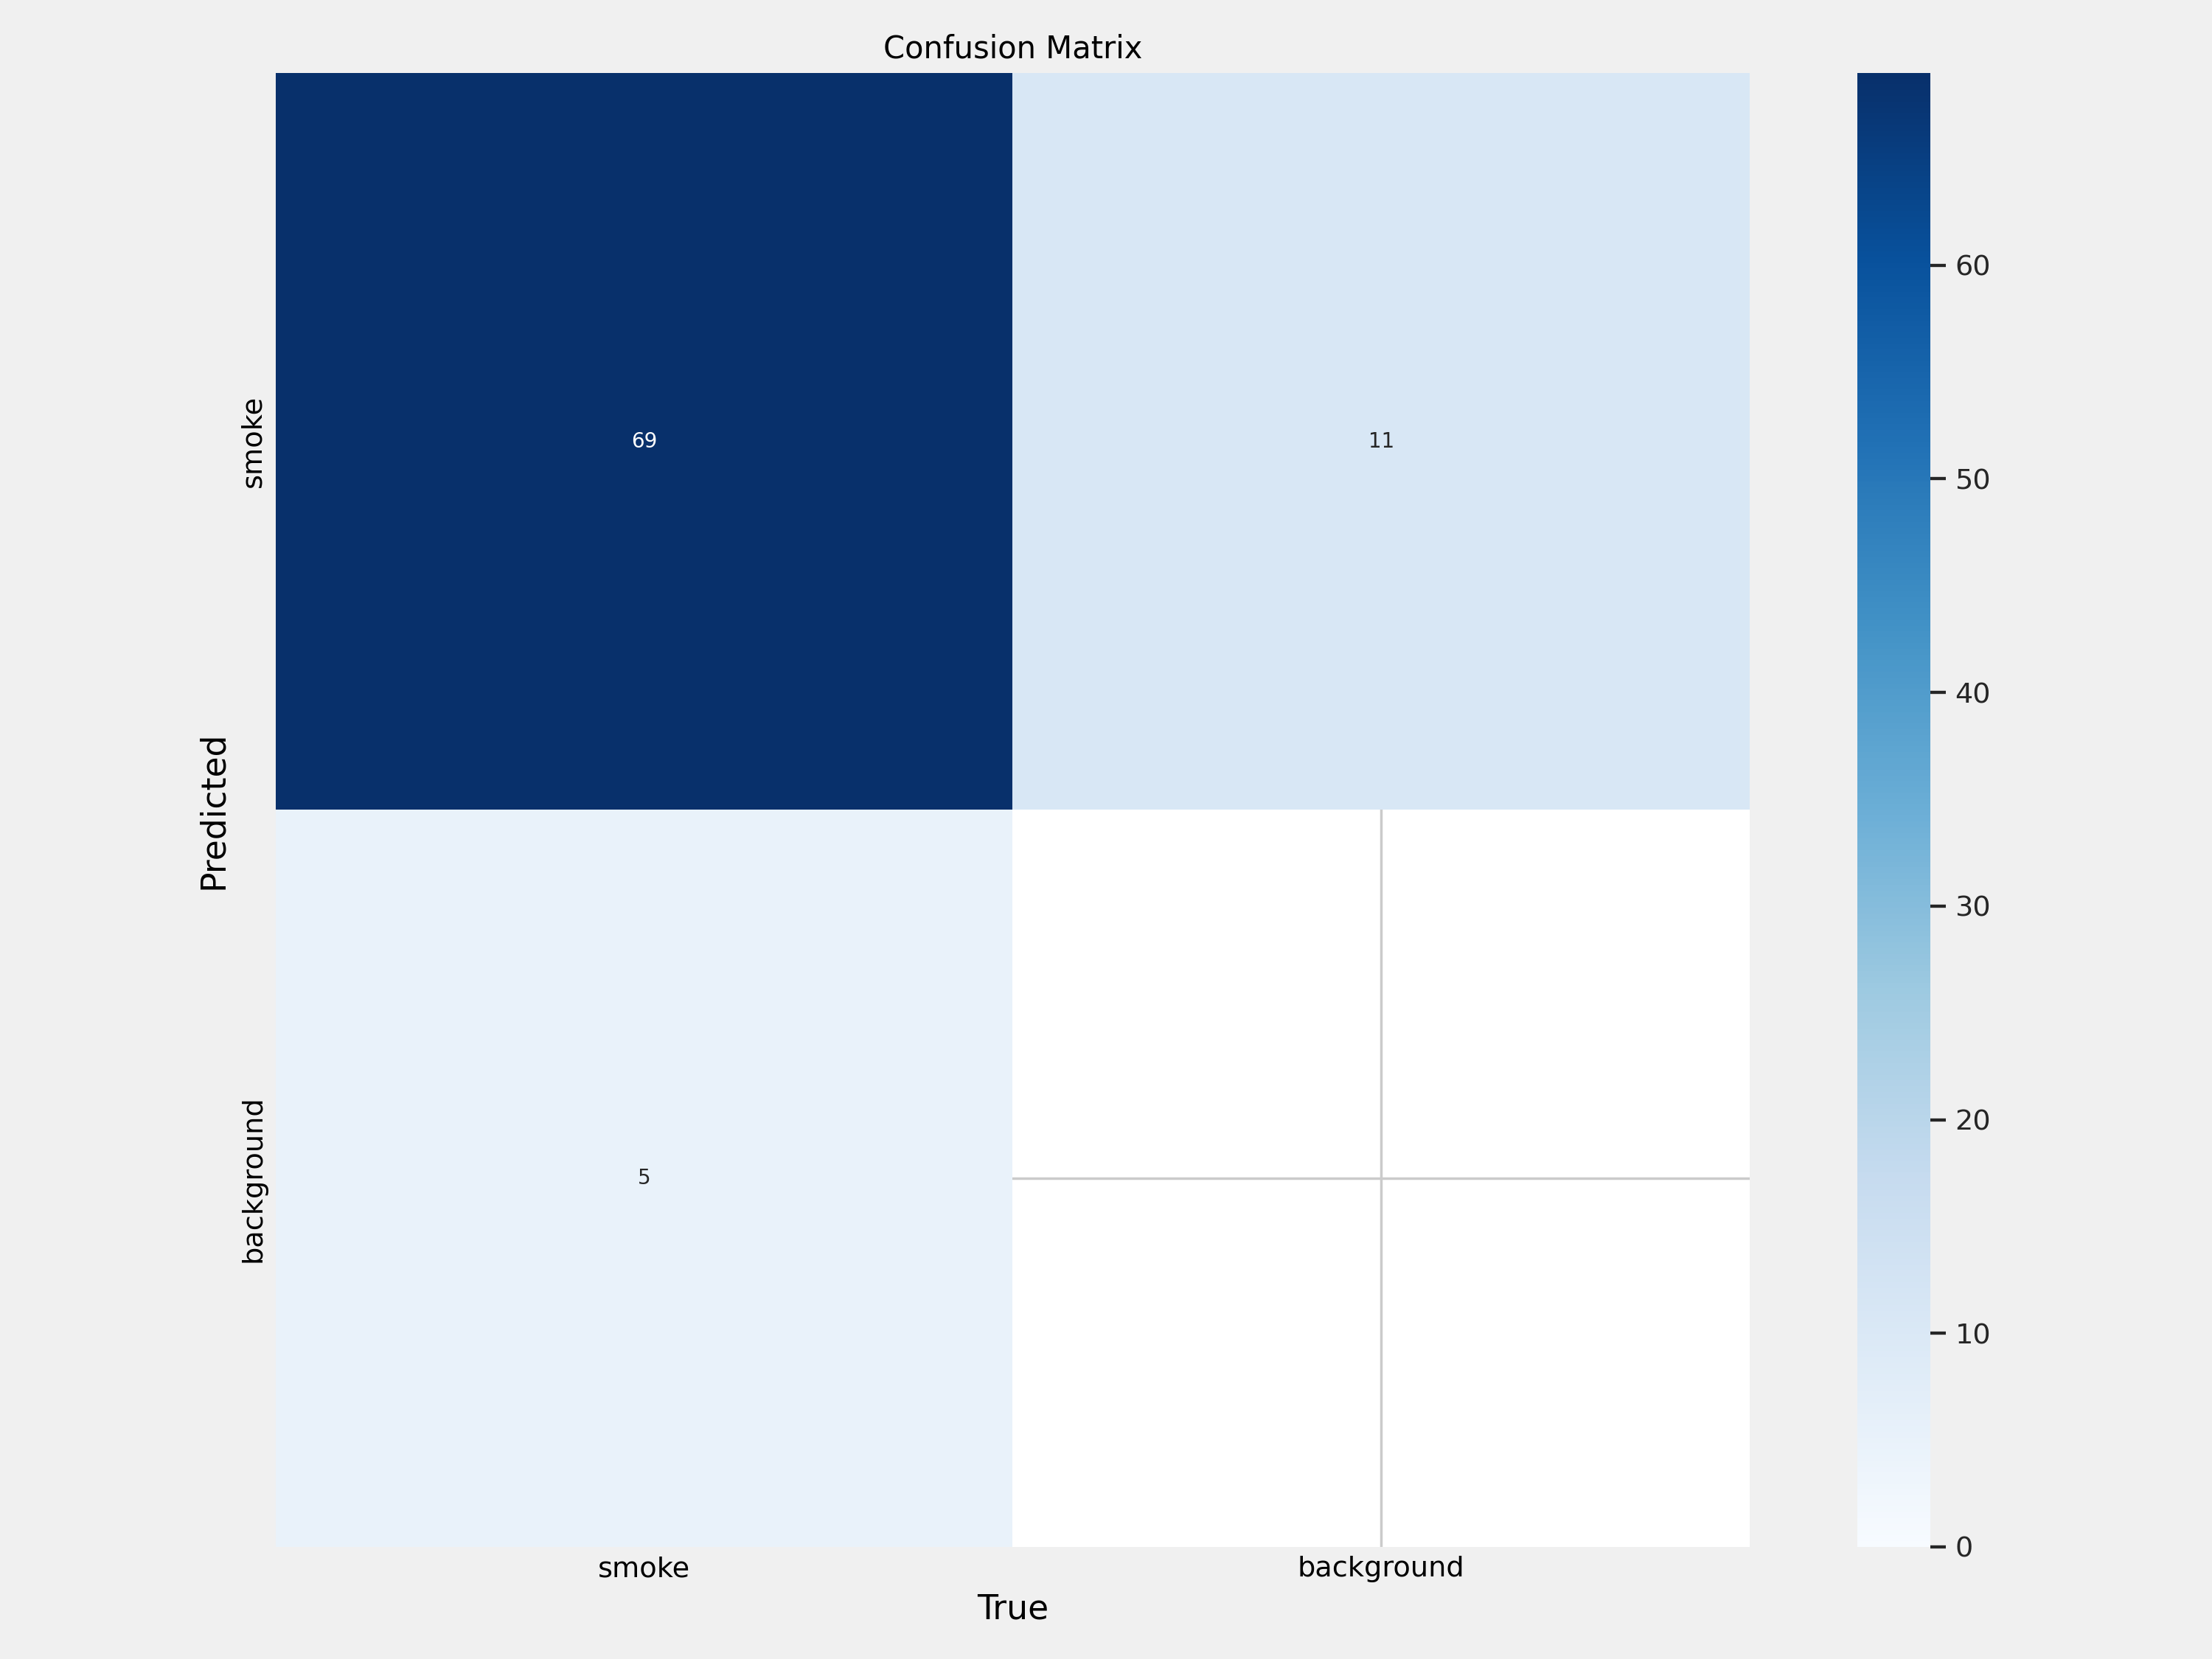

In [28]:
conf_matrix

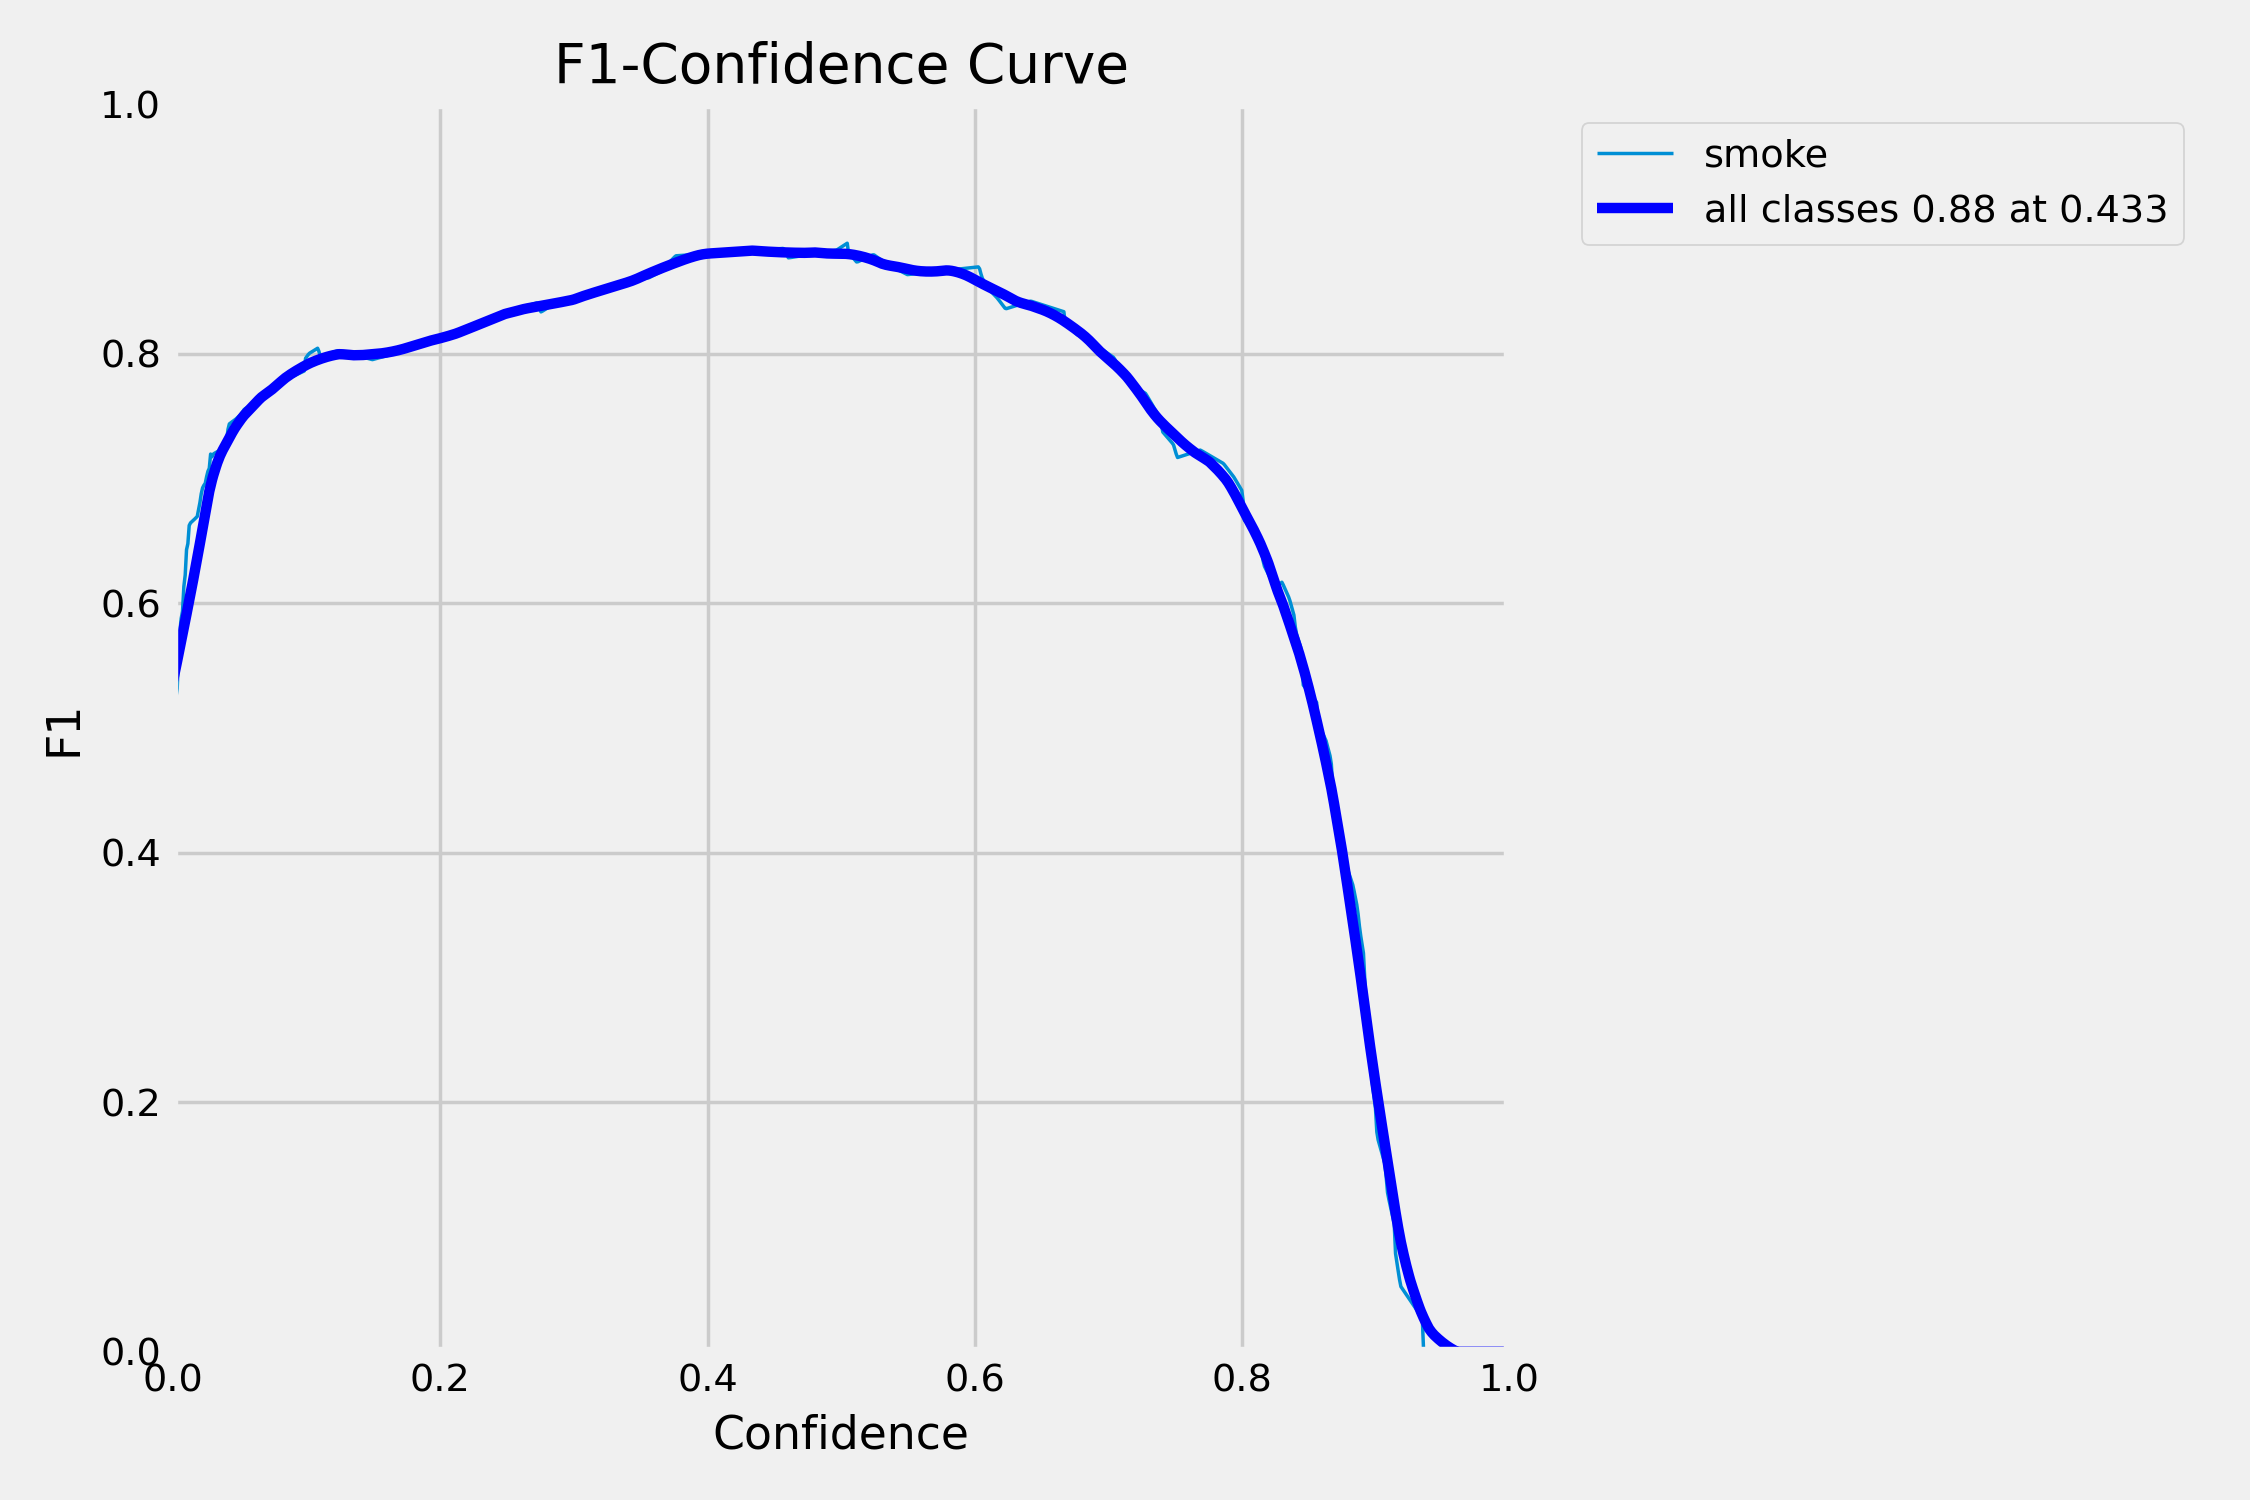

In [29]:
f1_curve

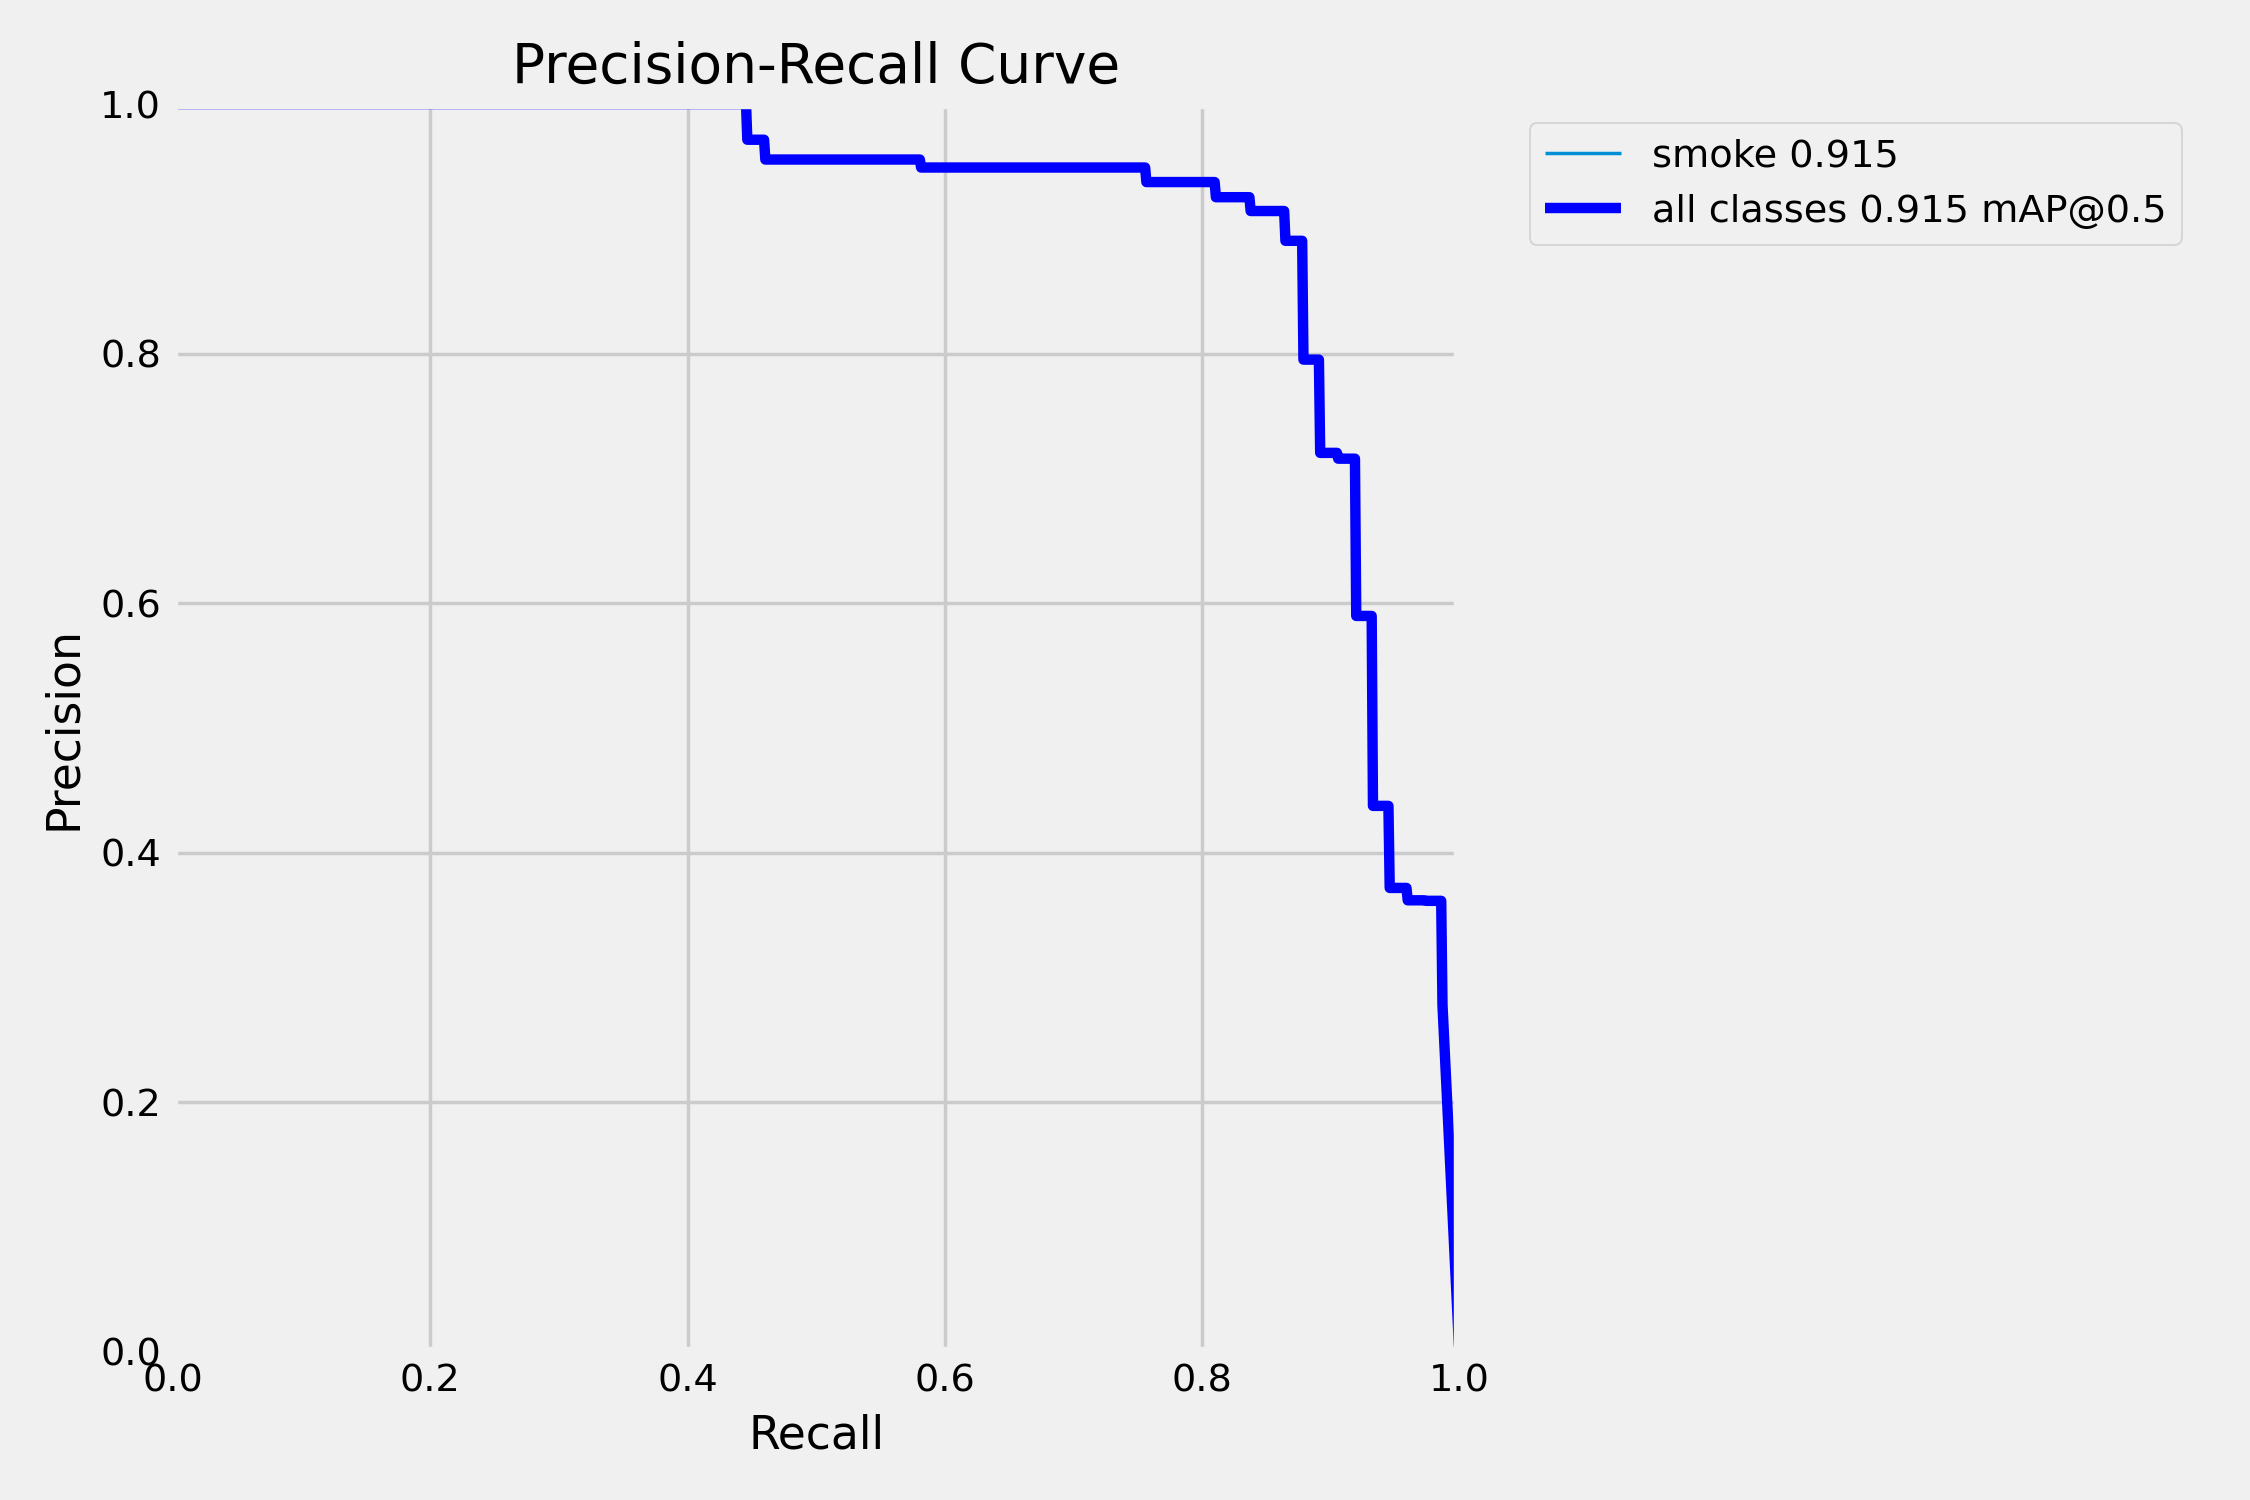

In [30]:
pr_curve

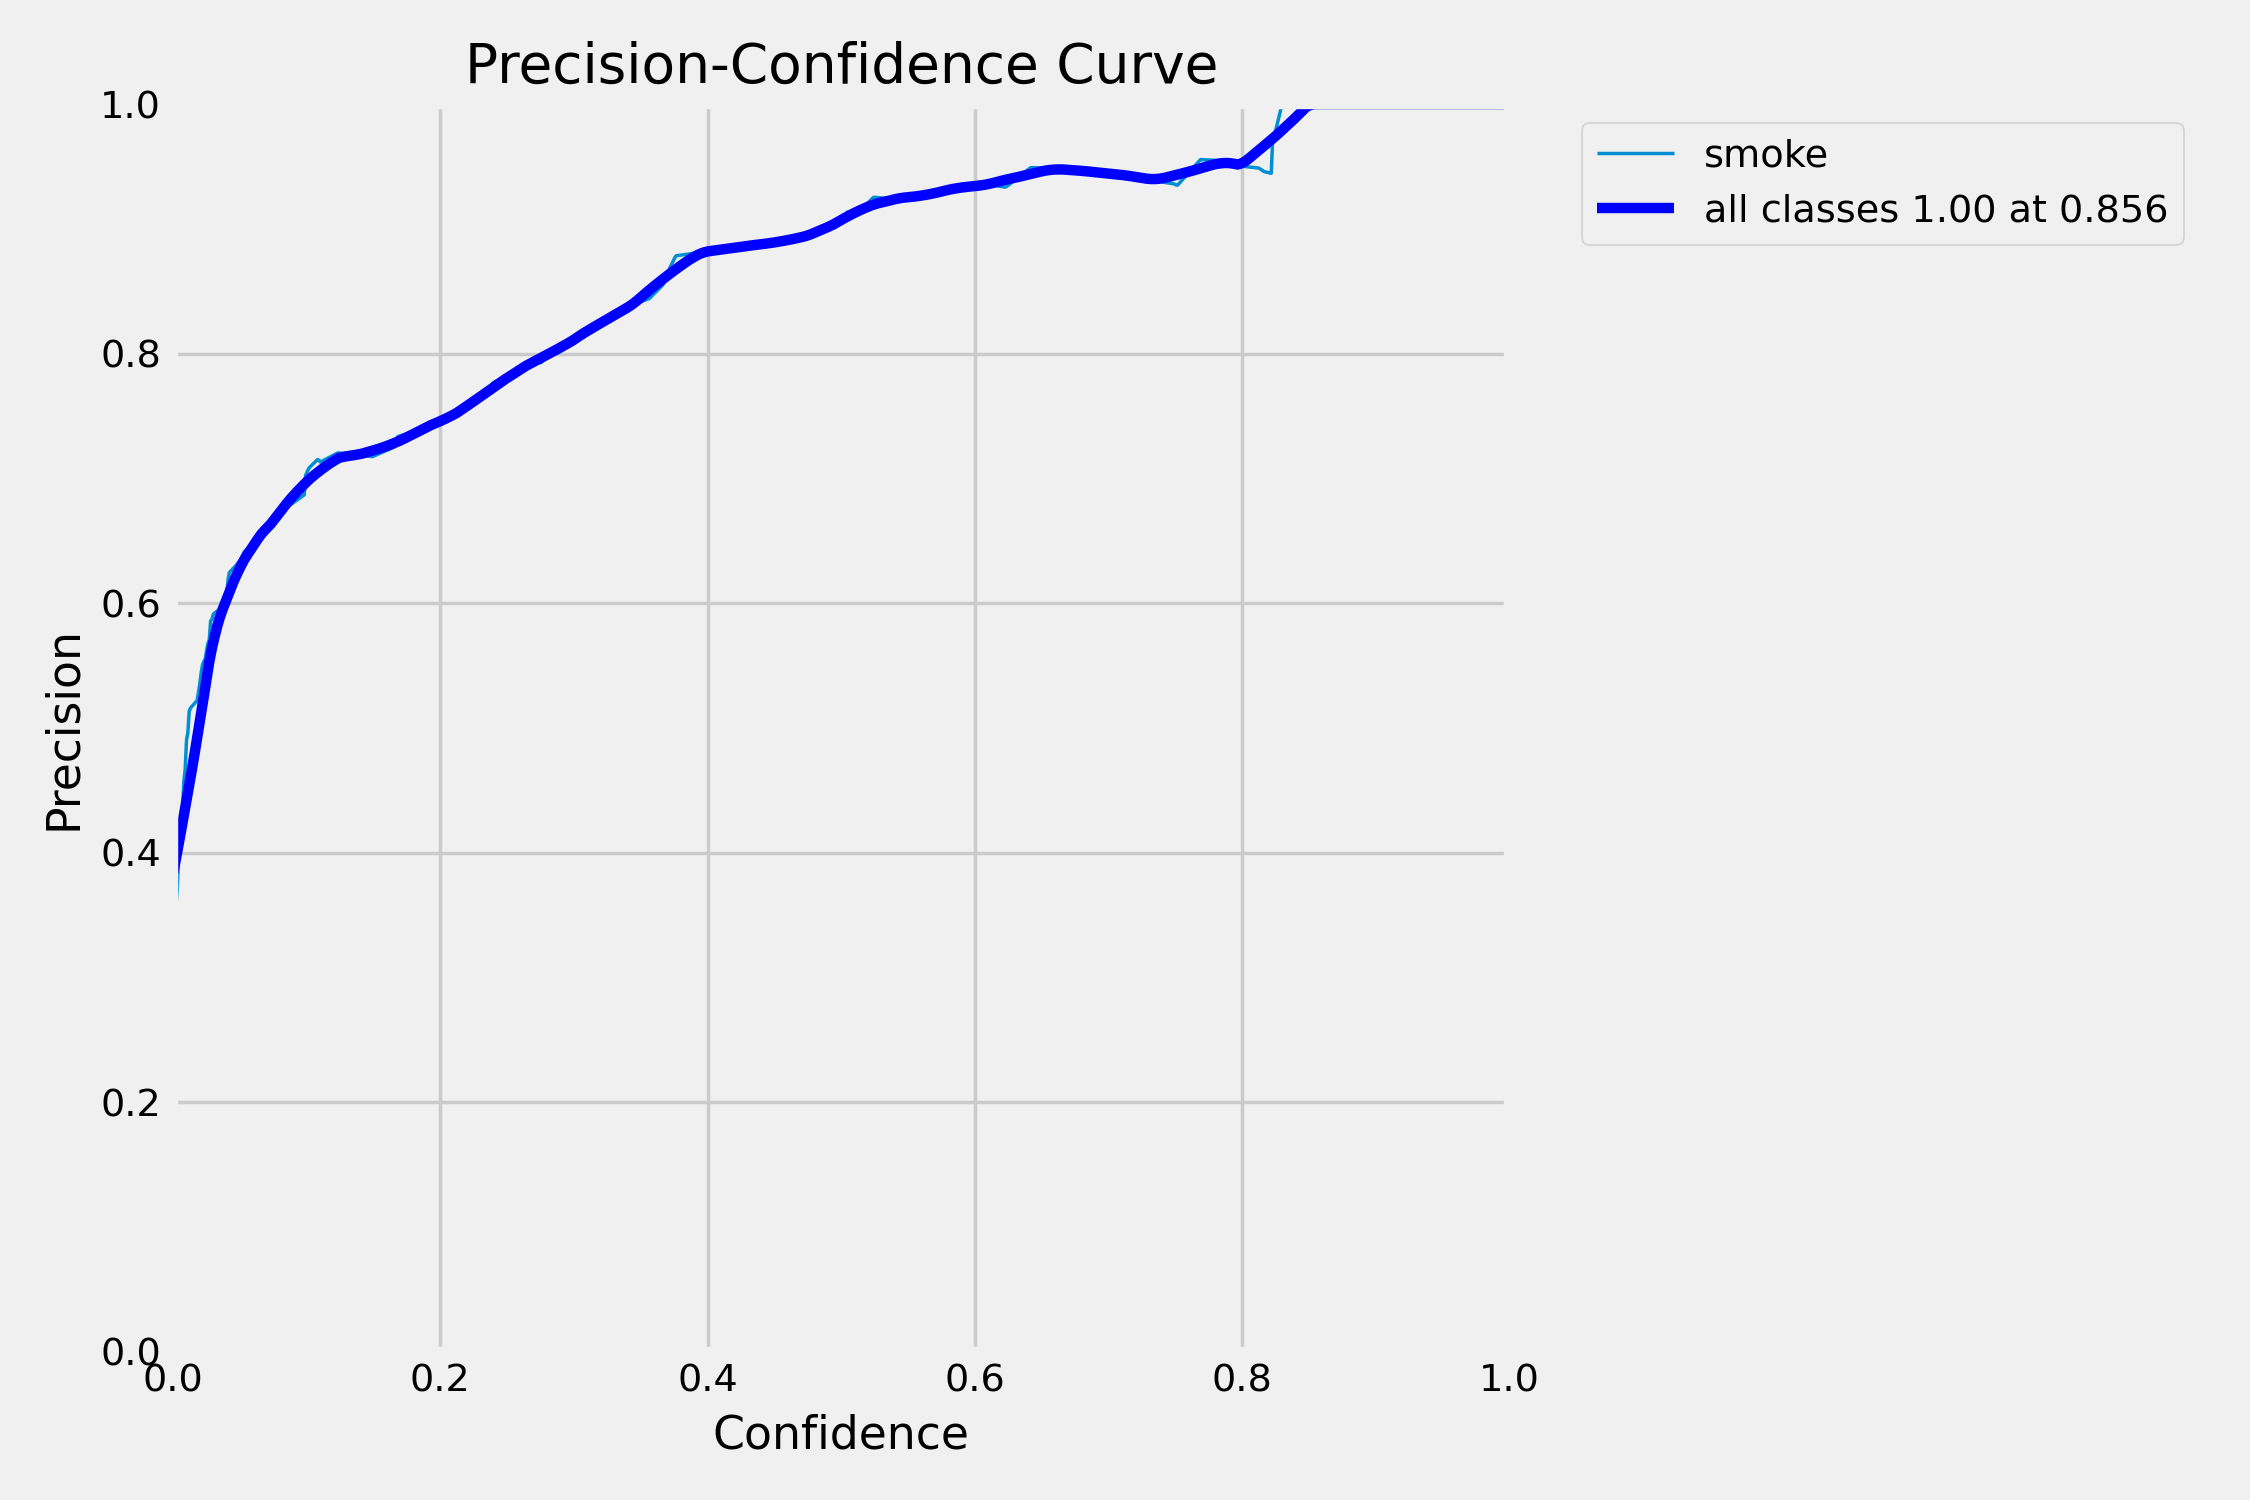

In [31]:
p_curve

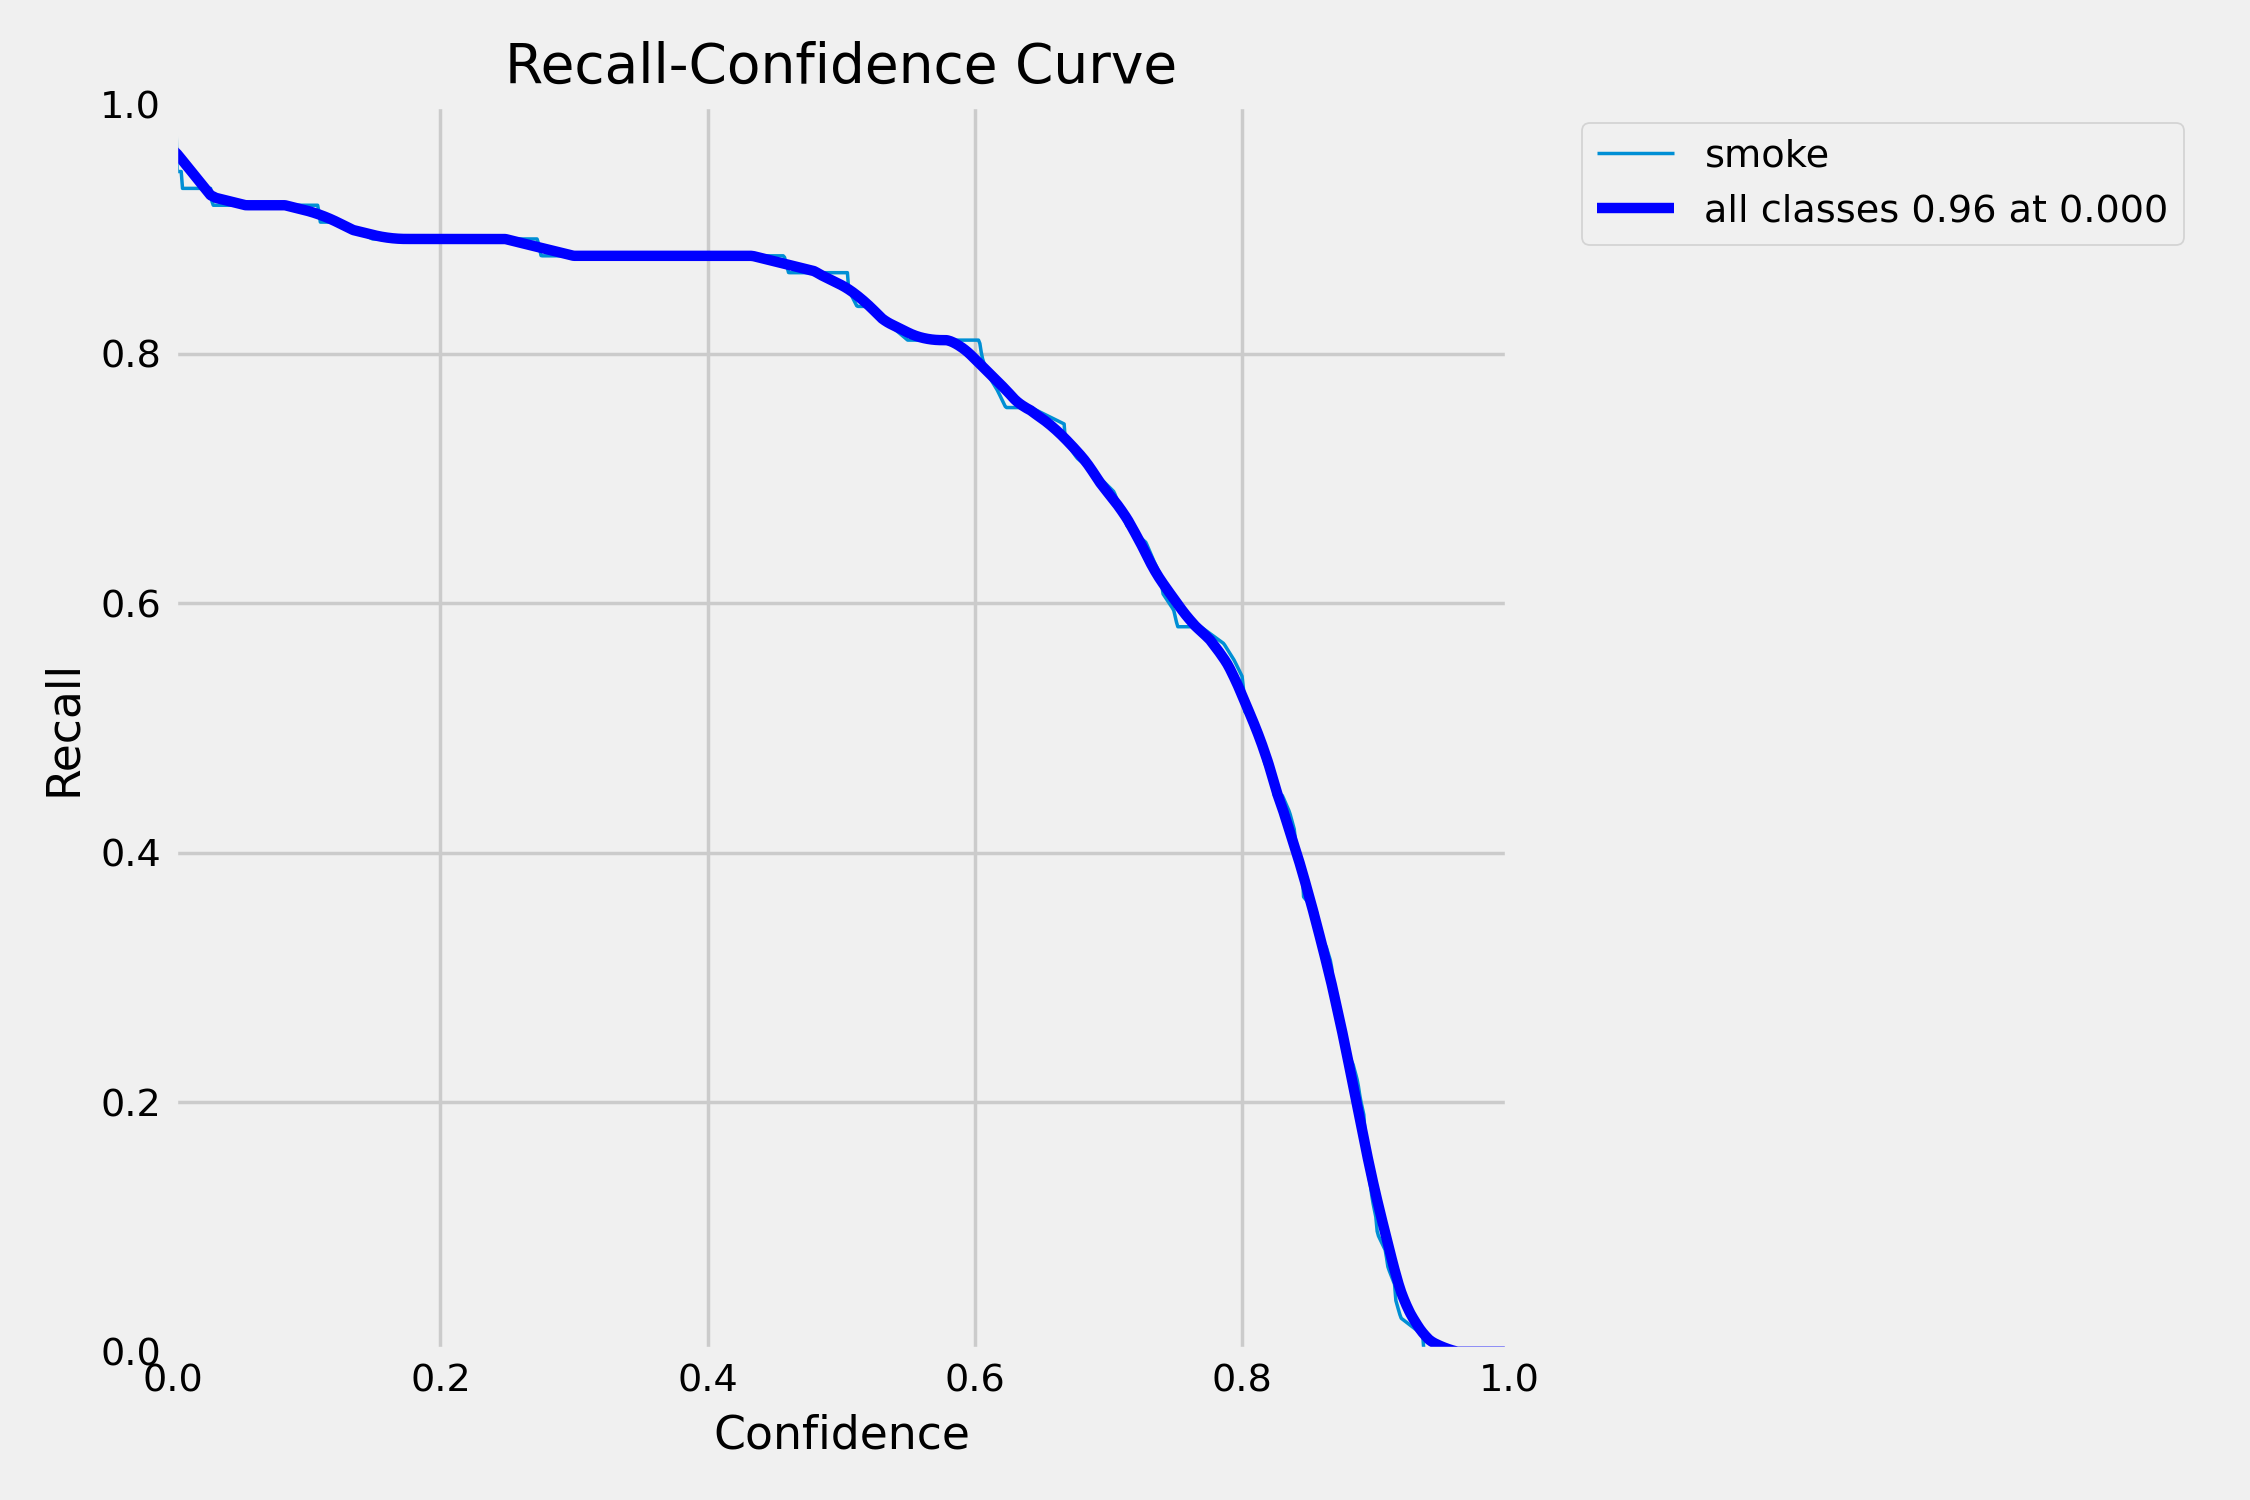

In [32]:
r_curve

In [33]:
test_batch_targets

Output hidden; open in https://colab.research.google.com to view.

In [34]:
test_batch_preds

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#results = model('path/to/your/image.jpg', conf=0.4, iou=0.5)